In [1]:
#pip install tensorflow-gpu
#pip install tensorflow
#import tensorflow as tf

In [2]:
# Import Packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv(r'C:/Users/kaush/Downloads/Fashion-MNIST/fashion-mnist_train.csv')
test_df = pd.read_csv(r'C:/Users/kaush/Downloads/Fashion-MNIST/fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype = 'float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [5]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size = 0.2, random_state=12345
)

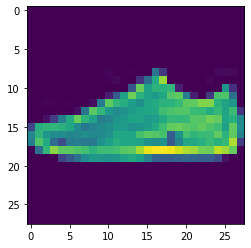

In [32]:
image = x_train[5, :].reshape((28,28))

plt.imshow(image)
plt.show()

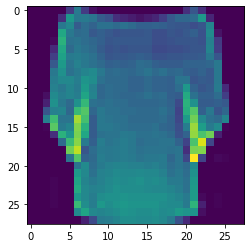

In [33]:
image = x_test[5, :].reshape((28,28))

plt.imshow(image)
plt.show()

In [7]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [8]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [40]:
tensorboard = TensorBoard(
    log_dir = r'C:/Users/kaush/Downloads/Fashion-MNIST/logs/{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [41]:
history = cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Epoch 1/10
94/94 [==============================] - 33s 356ms/step - loss: 0.2785 - accuracy: 0.9013 - val_loss: 0.2844 - val_accuracy: 0.8986
Epoch 2/10
94/94 [==============================] - 28s 296ms/step - loss: 0.2664 - accuracy: 0.9061 - val_loss: 0.2739 - val_accuracy: 0.9041
Epoch 3/10
94/94 [==============================] - 27s 285ms/step - loss: 0.2635 - accuracy: 0.9071 - val_loss: 0.2786 - val_accuracy: 0.9015
Epoch 4/10
94/94 [==============================] - 28s 301ms/step - loss: 0.2550 - accuracy: 0.9097 - val_loss: 0.2673 - val_accuracy: 0.9032
Epoch 5/10
94/94 [==============================] - 28s 296ms/step - loss: 0.2471 - accuracy: 0.9109 - val_loss: 0.2632 - val_accuracy: 0.9061
Epoch 6/10
94/94 [==============================] - 28s 301ms/step - loss: 0.2463 - accuracy: 0.9121 - val_loss: 0.2622 - val_accuracy: 0.9072
Epoch 7/10
94/94 [==============================] - 30s 315ms/step - loss: 0.2381 - accuracy: 0.9145 - val_loss: 0.2668 - val_accuracy: 0.9033

In [43]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('Test Loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

Test Loss: 0.2450
Test accuracy: 0.9146


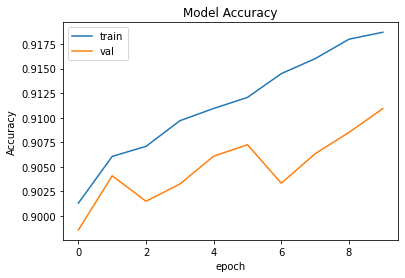

In [44]:
# Accuracy vs Epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

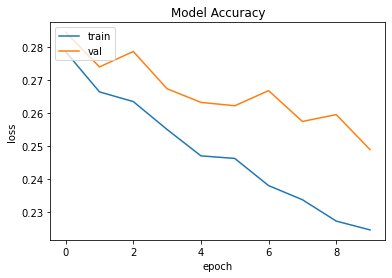

In [45]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
# # There are 10 output labels for the Fashion MNIST dataset
# labels = ['trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots', 't-shirt']
# # Make a prediction
# # for lab in labels:
# #     print(lab)
# predictions = cnn_model.predict(x_test[:])
# print(predictions)
# label = labels[np.argmax(predictions)]
# print(label)
# plt.imshow(x_test[0])
# plt.show()
# del predictions

[[9.8694670e-01 3.7528793e-08 5.2782474e-04 7.3587034e-05 5.2516909e-05
  9.1222407e-10 1.2354753e-02 9.4561435e-11 4.4720735e-05 1.9884721e-12]]
t_shirt


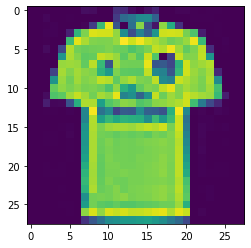

In [61]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = cnn_model.predict(x_test[:1])
print(predictions)
label = labels[np.argmax(predictions)]
del predictions
print(label)
plt.imshow(x_test[:1][0])
plt.show()